# Viz Training Curves

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import json

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

import seaborn as sns

## MoCo Backbone

train

In [5]:
def parse_training_log_type_moco(filepath, title=''):
    # Function to parse training log files of type 'moco'

    epochs = []
    train_loss = []

    with open(filepath, 'r') as f:
        # Read in list of dictionaries from file
        log_data = json.load(f)

    for entry in log_data:
        epochs.append(entry['epoch'])
        train_loss.append(entry['loss'])

    # Start epoch count from 1
    epochs = [e + 1 for e in epochs]

    # Create training loss curve plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Pre-training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

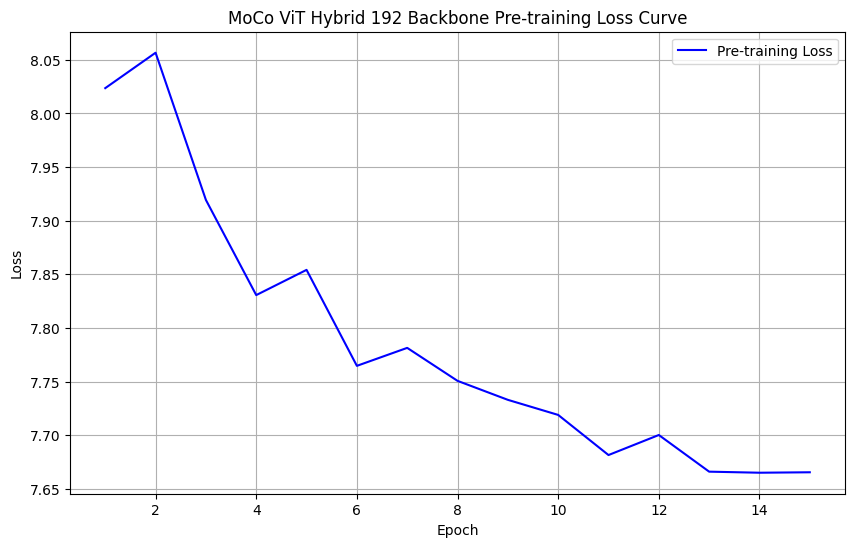

In [6]:
moco_log_train = './vit_hybrid_192_pretrain_stats_training.json'
parse_training_log_type_moco(moco_log_train, 'MoCo ViT Hybrid 192 Backbone Pre-training Loss Curve')

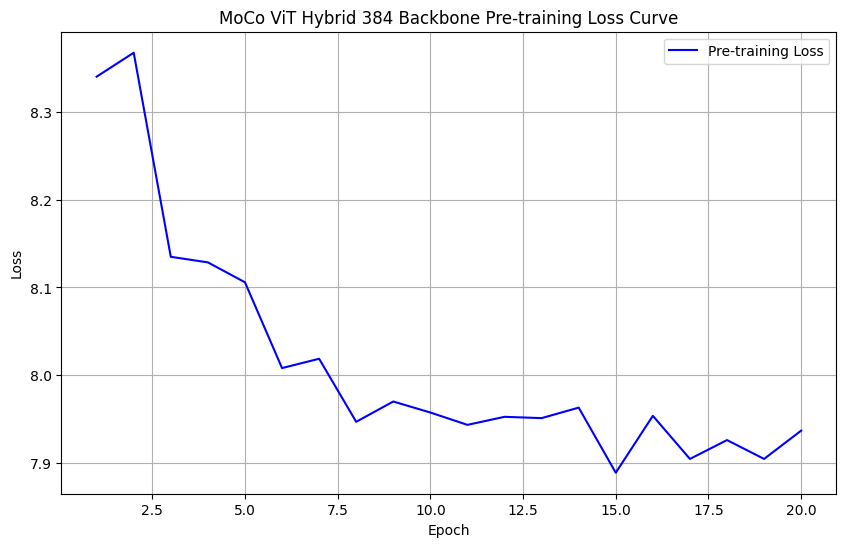

In [7]:
moco_log_train = './vit_hybrid_384_pretrain_stats_training.json'
parse_training_log_type_moco(moco_log_train, 'MoCo ViT Hybrid 384 Backbone Pre-training Loss Curve')

## Transfer Learning

In [5]:
def load_training_stats_and_plot(filepath, title=''):
    # Function to load training stats and plot training curves

    # Load training stats from pickle file
    with open(filepath, 'rb') as f:
        stats = pickle.load(f)

    epochs = [entry['epoch'] for entry in stats]
    train_loss = [entry['train_loss'] for entry in stats]
    val_loss = [entry['val_loss'] for entry in stats]
    train_acc = [entry['train_acc'] for entry in stats]
    val_acc = [entry['val_acc'] for entry in stats]

    # Plot Loss Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss Curve')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

NIH - Pneuonia Dataset - Binary

In [10]:
import re

from matplotlib.pyplot import title

def extract_losses_from_log(filepath, title):
    # Function to extract train and validation losses from log text

    # Read log text from file
    with open(filepath, 'r') as f:
        log_text = f.read() 

    train_losses = []
    val_losses = []

    # Regex for extract train_loss and val_loss from lines like:
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Regex patterns
    acc_pattern = r"train_acc=([0-9.]+), val_acc=([0-9.]+)"
    loss_pattern = r"train_loss=([0-9.]+), val_loss=([0-9.]+)"

    epochs = list(range(1, len(re.findall(acc_pattern, log_text)) + 1))

    # Extract accuracies
    for match in re.finditer(acc_pattern, log_text):
        train_acc.append(float(match.group(1)))
        val_acc.append(float(match.group(2)))

    # Extract losses
    for match in re.finditer(loss_pattern, log_text):
        train_loss.append(float(match.group(1)))
        val_loss.append(float(match.group(2)))

    # Plot Loss Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss Curve')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy Curve')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return train_loss, val_loss

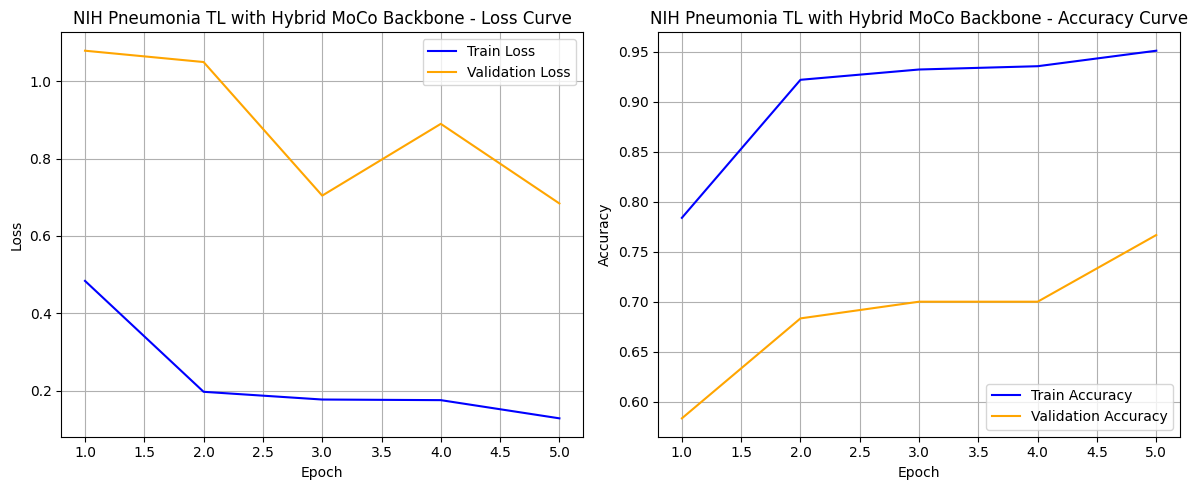

([0.4838, 0.1967, 0.1767, 0.1751, 0.128],
 [1.0796, 1.0503, 0.7045, 0.8903, 0.6842])

In [12]:
extract_losses_from_log("nih_binary_finetune_ViT_hybrid_training_log_20251204_074043.txt", title='NIH Pneumonia TL with Hybrid MoCo Backbone')

Chexpert

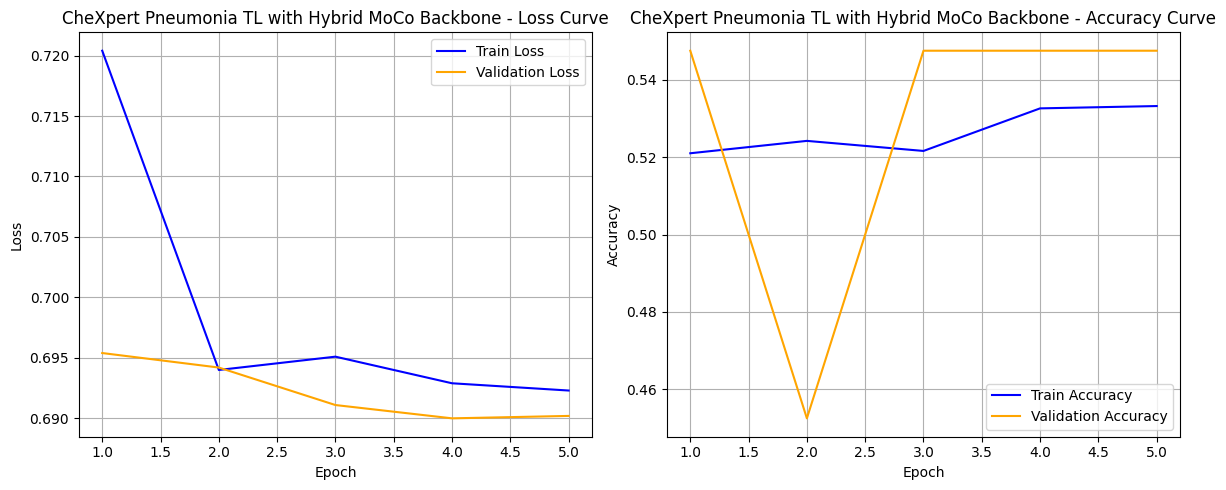

([0.7204, 0.694, 0.6951, 0.6929, 0.6923],
 [0.6954, 0.6942, 0.6911, 0.69, 0.6902])

In [13]:
filepath = './chexpert_binary_finetune_ViT_hybrid_training_log_20251204_074722.txt'
extract_losses_from_log(filepath, title='CheXpert Pneumonia TL with Hybrid MoCo Backbone')